<a href="https://colab.research.google.com/github/NimraAkram321/Fraudlent-transaction-prediction/blob/main/Fraudlent_transaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [4]:
from google.colab import drive 


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv(r'/content/drive/MyDrive/Fraud.csv')

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048545e+06,1.048574e+06,1.048546e+06,1.048573e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740342e+05,8.938098e+05,9.781866e+05,1.114200e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971789e+06,3.008273e+06,2.296807e+06,2.416595e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600300e+04,0.000000e+00,1.264085e+05,2.182613e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366530e+05,1.746007e+05,9.159561e+05,1.149824e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [8]:
#looking for the missing values 

data.isnull().sum().sort_values(ascending=False)

oldbalanceOrg     30
oldbalanceDest    29
newbalanceDest     2
newbalanceOrig     1
step               0
type               0
amount             0
nameOrig           0
nameDest           0
isFraud            0
isFlaggedFraud     0
dtype: int64

In [9]:
# Data type of attributes(columns)
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
#removal of missing values 
data.oldbalanceOrg .replace([np.nan], data.oldbalanceOrg.mean(), inplace=True);
data.oldbalanceDest .replace([np.nan], data.oldbalanceDest.mean(), inplace=True);
data.newbalanceDest  .replace([np.nan], data.newbalanceDest.mean(), inplace=True);
data.newbalanceOrig .replace([np.nan], data.newbalanceOrig.mean(), inplace=True);

In [11]:
data.isnull().sum().sort_values(ascending=False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
#Outlier Treatment for countinuous variable

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
for feature in data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']]: 
    lr,ur=remove_outlier(data[feature])
    data[feature]=np.where(data[feature]>ur,ur,data[feature])
    data[feature]=np.where(data[feature]<lr,lr,data[feature])

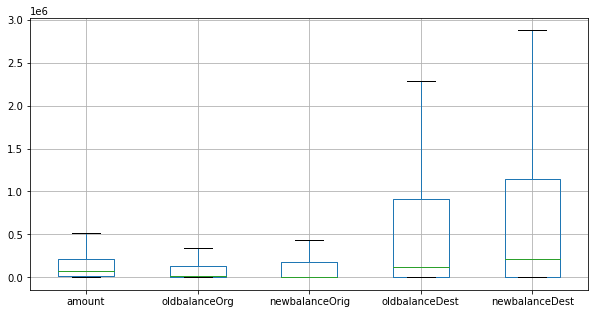

In [14]:
plt.figure(figsize=(10,5))
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']].boxplot()

In [15]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.000000,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.000000,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000000,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.000000,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,978186.562879,0.0,0,0


In [16]:
#Converting Categorical to numerical
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
lable_encoder= LabelEncoder()
data['nameOrig'] = lable_encoder.fit_transform(data['nameOrig'])
data['nameDest'] = lable_encoder.fit_transform(data['nameDest'])
data['type'] = lable_encoder.fit_transform(data['type'])
print(data['nameOrig'].head())
print(data['nameDest'].head())
print(data['type'].head())

0    125164
1    361319
2    165236
3    961662
4    567915
Name: nameOrig, dtype: int64
0    274917
1    286716
2     73550
3     65464
4    138001
Name: nameDest, dtype: int64
0    3
1    3
2    4
3    1
4    3
Name: type, dtype: int64


In [17]:
#Train & Test Slit
y=data['isFraud']
x=data.drop('isFraud',axis=1);

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [19]:
y_train.value_counts()

0    733187
1       815
Name: isFraud, dtype: int64

In [20]:
y_test.value_counts()

0    314246
1       327
Name: isFraud, dtype: int64

[0 0 0 ... 0 0 0]
Accuracy: 0.9994468692481554


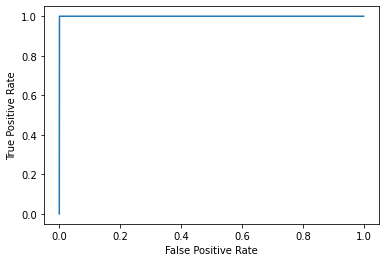

In [21]:
# decisionTressClassification
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
dt=DecisionTreeClassifier(criterion='gini',max_depth=3);
dt=dt.fit(x_train,y_train);
y_pred = dt.predict(x_test);
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))





fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Accuracy: 0.9994468692481554


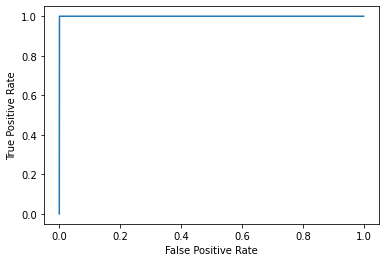

In [22]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3);
dt=dt.fit(x_train,y_train);
y_pred = dt.predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Accuracy: 0.9986775724553602


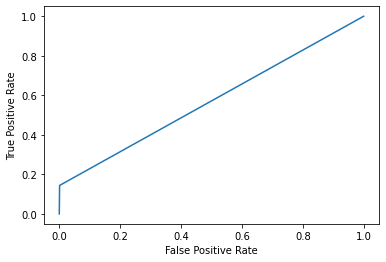

In [23]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train);
y_pred=clf.predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.9993197127534785


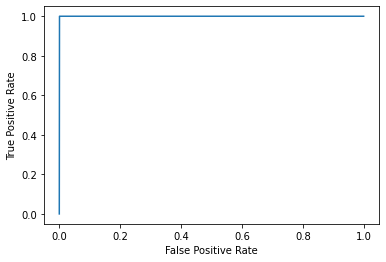

In [24]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=4, random_state=0);
clf.fit(x_train, y_train);
y_pred=clf.predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.9988810228468432


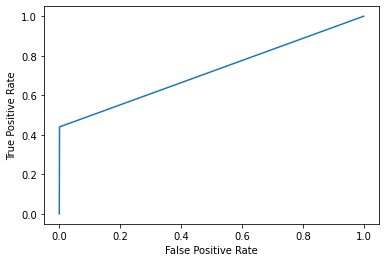

In [25]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
y_pred =clf.fit(x_train, y_train).predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()